In [6]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plot
import tov
from tov import tov
from tov import eos
from tov import tov_utils
from tov import tov_utils_new
import tov.constants as u
from collections import namedtuple
import functools
from functools import partial
from tov import *
import pandas as pd

In [7]:
##SFHx data
df = pd.read_csv(r"C:\Users\Abhimkul\Downloads\SFHx)_Data_points")
energy = df.iloc[:,0].to_numpy()
Pressure = df.iloc[:,1].to_numpy()
Pressure[0], Pressure[-1]


(0.9912500131952512, 1579.331445149521)

In [8]:
#check1 
GA1 = np.linspace(1.71,4.5,1000)
GA2 = np.linspace(1.01,8,1000)
GA3 = np.linspace(1.01,8,1000)
logp1 = np.linspace(34.3,34.9,1000)

Parameters = np.vstack((logp1,GA1,GA2,GA3)).T
Parameters

array([[34.3       ,  1.71      ,  1.01      ,  1.01      ],
       [34.3006006 ,  1.71279279,  1.016997  ,  1.016997  ],
       [34.3012012 ,  1.71558559,  1.02399399,  1.02399399],
       ...,
       [34.8987988 ,  4.49441441,  7.98600601,  7.98600601],
       [34.8993994 ,  4.49720721,  7.993003  ,  7.993003  ],
       [34.9       ,  4.5       ,  8.        ,  8.        ]])

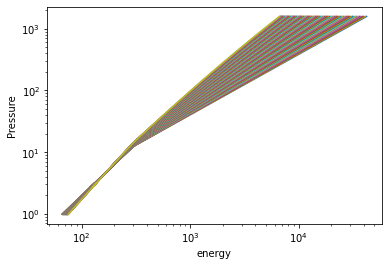

In [9]:
Params = namedtuple('EoSReadCoreParams', ['log_p1', 'G1', 'G2', 'G3'])

for i in range(1,100):
   try: 
      EoS_fit1 = eos.EoS_Read(params = Params(*Parameters[i]))
      energy1 = [EoS_fit1.E_P(P=i) for i in Pressure]
      plot.plot(energy1,Pressure)
      plot.xscale("log")
      plot.yscale("log")
      plot.xlabel("energy")
      plot.ylabel("Pressure")
   except ValueError:
      continue

In [10]:
#Check1 - Core - Crust Intersection
np.random.seed(1)
GA1 = np.random.permutation(np.linspace(1.71,4.5,10000))
GA2 = np.random.permutation(np.linspace(1.01,8,10000))
GA3 = np.random.permutation(np.linspace(1.01,8,10000))
logp1 = np.random.permutation(np.linspace(34.3,34.9,10000))

Parameters1 = np.vstack((logp1,GA1,GA2,GA3)).T
Parameters1

Pressure_grid = np.linspace(Pressure[0],Pressure[-1],1000)

##Issue1: Core-Crust Intersection
for i in range(0,1000):
    try:
       EoS_fit1 = eos.EoS_Read(params = Params(*Parameters1[i]))
    except ValueError as e:
           print(f"Error with parameter set{Parameters1[i]}:{e}")
           continue

Error with parameter set[34.66417642  1.78980198  7.46870687  1.90061506]:f(a) and f(b) must have different signs
Error with parameter set[34.65673567  1.78087309  5.17645665  1.53919592]:f(a) and f(b) must have different signs
Error with parameter set[34.48751875  1.77194419  5.36171017  5.64553255]:f(a) and f(b) must have different signs
Error with parameter set[34.65367537  1.77082808  7.69380738  6.13837684]:f(a) and f(b) must have different signs
Error with parameter set[34.84389439  1.88439244  4.4620072   6.30755176]:f(a) and f(b) must have different signs
Error with parameter set[34.76174617  1.88271827  5.37848785  7.32120312]:f(a) and f(b) must have different signs
Error with parameter set[34.6039904   1.78254725  7.60921992  4.62838584]:f(a) and f(b) must have different signs
Error with parameter set[34.75718572  1.78756976  3.32252325  7.34007801]:f(a) and f(b) must have different signs
Error with parameter set[34.6540354   1.74571557  6.28727873  7.81474647]:f(a) and f(b) 

In [11]:
#Check2 - For Monotonously decreaseing functon     (Parmeters)
Params = namedtuple('EoSReadCoreParams', ['log_p1', 'G1', 'G2', 'G3'])

Pressure_grid = np.linspace(Pressure[0],Pressure[-1],1000)

for i in range(0,100):
    EoS_fit1 = eos.EoS_Read(params = Params(*Parameters[i]))
    energy = [EoS_fit1.E_P(P=i , d=1) for i in Pressure_grid]
    for j in energy:
        if j <= 0:
            print("Error : Monotically decresing EoS Found")

In [13]:
#Check2 - For Monotonously decreasing functon     (Parameters1)
Params = namedtuple('EoSReadCoreParams', ['log_p1', 'G1', 'G2', 'G3'])
Pressure_grid = np.linspace(Pressure[0],Pressure[-1],1000)

for i in range(0,100):
    try:
        EoS_fit1 = eos.EoS_Read(params = Params(*Parameters1[i]))
        energy = [EoS_fit1.E_P(P=i , d=1) for i in Pressure_grid]
        for j in energy:
            if j <= 0:
                print("Error : Monotically decresing EoS Found")
    except ValueError as e:
        print(f"Error : {e}") 
        continue

Error : f(a) and f(b) must have different signs
Error : f(a) and f(b) must have different signs
Error : f(a) and f(b) must have different signs
Error : f(a) and f(b) must have different signs
Error : f(a) and f(b) must have different signs
